In [1]:
pip install pandas scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd

# Load matches data
df = pd.read_csv('matches.csv')
df.head()


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [29]:
# Check for nulls
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [31]:
# Drop or fill nulls
df = df.dropna(subset=['winner', 'team1', 'team2'])

In [33]:
# Convert categorical data to numeric
df = df.dropna(subset=['winner'])  # Drop matches with no result
df['team1'] = df['team1'].astype('category').cat.codes
df['team2'] = df['team2'].astype('category').cat.codes
df['winner'] = df['winner'].astype('category').cat.codes

In [35]:
features = df[['team1', 'team2']]
target = df['winner']

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [39]:
X = df[['win_by_runs', 'win_by_wickets']]
y = df['winner']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [43]:
model = RandomForestClassifier()

In [45]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = model.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.543046357615894

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Match Winner Distribution')

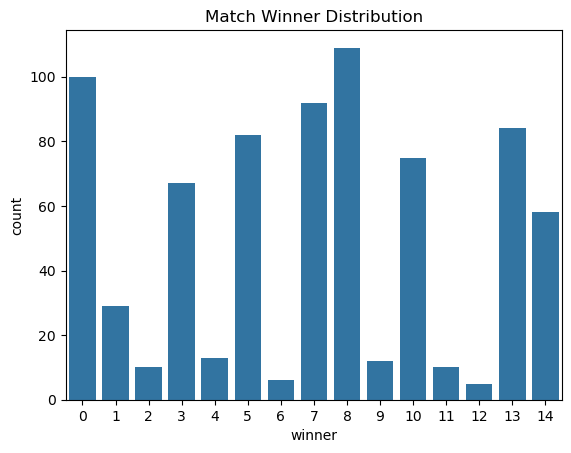

In [57]:
sns.countplot(x='winner', data=df)
plt.title('Match Winner Distribution')

In [59]:
import joblib

joblib.dump(model, 'ipl_model.pkl')

['ipl_model.pkl']